Графики электростатического потенциала: аналитическая теория/sfbox при варьировании S, Cs и pHb

In [106]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')


from py_utils.annealing_brush import annealing_anion
from py_utils.quenched_brush import quecnhed_br

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

Задаю постоянные параметры

In [107]:
#ПАРАМЕТРЫ
N = 400

pK_brush = 4.5
pK_minus = 3
pK_plus = 7
f_plus = 0.5

delta_pK_brush = -0.3

Варьирование S

$\theta = 4.0, alpha_z = 0.22097100693269958, pH = 1.5848680739949e-05$
$\theta = 2.0, alpha_z = 0.29769330886833456, pH = 1.5848680739949e-05$
$\theta = 1.3333333333333333, alpha_z = 0.3464069408858972, pH = 1.5848680739949e-05$


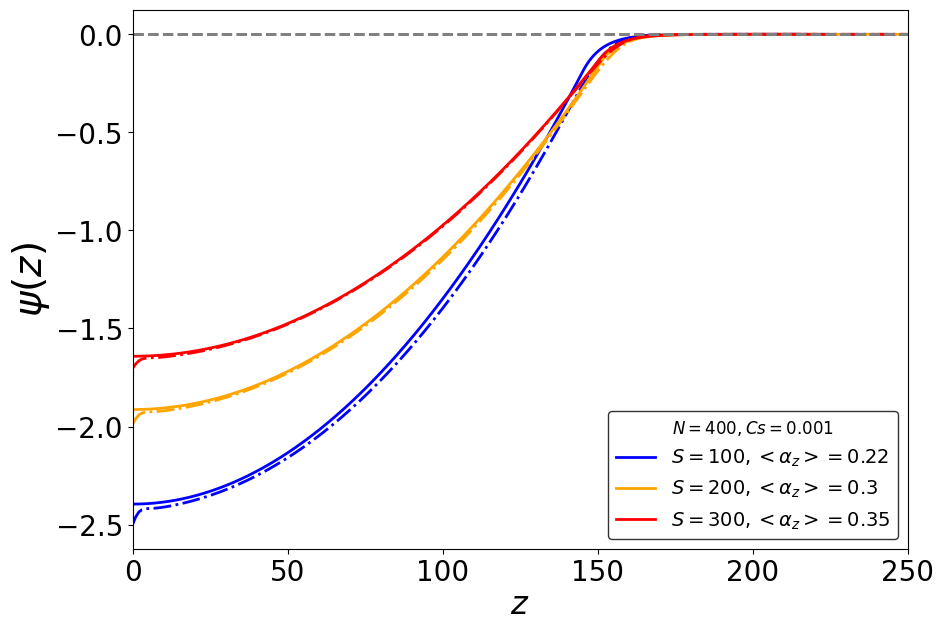

In [108]:
S_range = [100, 200, 300]
files_anneal = ['a_theta_4.pro', 'a_theta_2.pro', 'a_theta_1.3.pro']
files_quenched = ['q_theta_4.pro', 'q_theta_2.pro', 'q_theta_1.3.pro']

colors = ['blue', 'orange', 'red', 'purple', 'limegreen', 'pink', 'olive']

fig, axs = plt.subplots()

for S, color, file_annel, file_que in zip(S_range, colors, files_anneal, files_quenched):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_b, \
                delta_pK, pH_b, pH_iep, pH_sfbox, delta_pH_b, \
                z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
                polymer_dens_anneal, \
                f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,  = annealing_anion(
        N = N, 
        S = S,
        Cs = 0.001,
        delta_pK = delta_pK_brush, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = file_annel, 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/psi_compare_sfbox_range_S_Cs_pH/')
            
        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = alpha_z_mean,
                Cs = 0.001,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = file_que,
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/psi_compare_sfbox_range_S_Cs_pH/')
        
        print(f'$\\theta = {N/S}, alpha_z = {alpha_z_mean}, pH = {pH_sfbox}$')

        # #POTENTIAL Сильная щетка
        axs.plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '-',
                linewidth = 2, color = color, label = f'$S = {S}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        axs.plot(parse_SCF_psi_quen, linestyle = '-.',
                linewidth = 2, color = color)

#POTENTIAL Слабая щетка
        # axs.plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
        #         linewidth = 2, color = color)
        
        # axs.plot(parse_SCF_psi, linestyle = '-.',
        #         linewidth = 2, color = color)


#ОФОРМЛЕНИЕ ГРАФИКОВ

#ГОРИЗОНТАЛЬНЫЕ ЛИНИИ
axs.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

axs.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

#ПОДПИСЬ ОСИ Х
axs.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

#ПОДПИСЬ ОСИ Y

axs.set_ylabel("$\psi (z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs.legend(title = f'$N = {N}, Cs = {0.001}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'lower right')

fig.set_figwidth(10)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

axs.set_xlim(0, 250)

# save = fig.savefig('наложение_теория_намикс_абсорбция.svg', dpi = 200)

plt.show()

Изменяем концентрацию соли

$Cs = 0.0001, alpha_z = 0.06461896097029696, pH = 1.5848680739949e-05$
$Cs = 0.0005, alpha_z = 0.1575500883943531, pH = 1.5848680739949e-05$
$Cs = 0.001, alpha_z = 0.22097100693269958, pH = 1.5848680739949e-05$


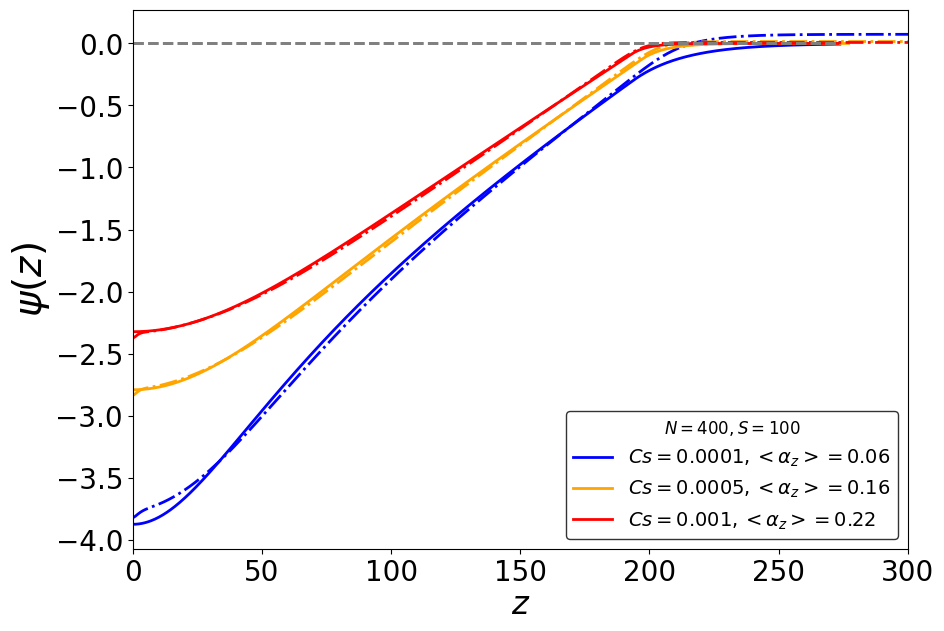

In [109]:
Cs_range = [0.0001, 0.0005, 0.001]
files_anneal = ['a_cs_0.0001.pro', 'a_cs_0.0005.pro', 'a_cs_0.001.pro']
files_quenched = ['q_cs_0.0001.pro', 'q_cs_0.0005.pro', 'q_cs_0.001.pro']

colors = ['blue', 'orange', 'red', 'purple', 'limegreen', 'pink', 'olive']

fig, axs = plt.subplots()

for cs, color, file_annel, file_que in zip(Cs_range, colors, files_anneal, files_quenched):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_b, \
                delta_pK, pH_b, pH_iep, pH_sfbox, delta_pH_b, \
                z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
                polymer_dens_anneal, \
                f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,  = annealing_anion(
        N = N, 
        S = 100,
        Cs = cs,
        delta_pK = delta_pK_brush, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = file_annel, 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/psi_compare_sfbox_range_S_Cs_pH/')
            
        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = 100, 
                alpha = alpha_z_mean,
                Cs = cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = file_que,
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/psi_compare_sfbox_range_S_Cs_pH/')
        
        print(f'$Cs = {cs}, alpha_z = {alpha_z_mean}, pH = {pH_sfbox}$')

        # #POTENTIAL Сильная щетка
        # axs.plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '-',
        #         linewidth = 2, color = color, label = f'$Cs = {cs}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        # axs.plot(parse_SCF_psi_quen, linestyle = '-.',
        #         linewidth = 2, color = color)

        #POTENTIAL Слабая щетка
        axs.plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
                linewidth = 2, color = color, label = f'$Cs = {cs}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        axs.plot(parse_SCF_psi, linestyle = '-.',
                linewidth = 2, color = color)


#ОФОРМЛЕНИЕ ГРАФИКОВ

#ГОРИЗОНТАЛЬНЫЕ ЛИНИИ
axs.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

axs.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

#ПОДПИСЬ ОСИ Х
axs.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

#ПОДПИСЬ ОСИ Y

axs.set_ylabel("$\psi (z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs.legend(title = f'$N = {N}, S = {100}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'lower right')

fig.set_figwidth(10)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

axs.set_xlim(0, 300)

# save = fig.savefig('наложение_теория_намикс_абсорбция.svg', dpi = 200)

plt.show()

Изменение pH_b

$alpha_z = 0.06775591374440995, pH = 9.999000099990002e-05$
$alpha_z = 0.14590519344262465, pH = 3.162177663330557e-05$
$alpha_z = 0.284713643340224, pH = 9.99990000099999e-06$


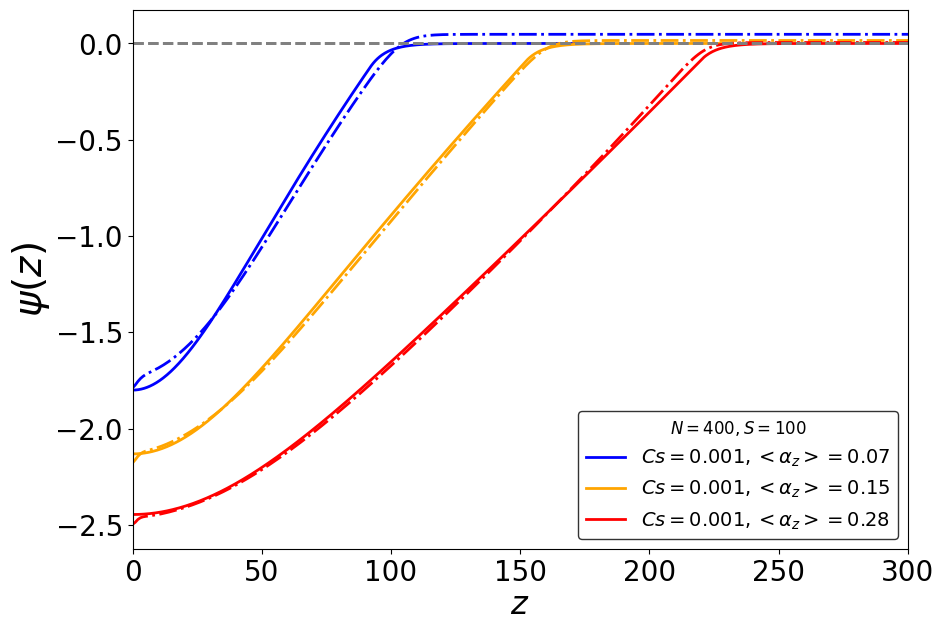

In [110]:
pH_range = [0.5, 0, -0.5]
files_anneal = ['a_dpk_0.5.pro', 'a_dpk_0.pro', 'a_dpk_-0.5.pro']
files_quenched = ['q_dpk_0.5.pro', 'q_dpk_0.pro', 'q_dpk_-0.5.pro']

colors = ['blue', 'orange', 'red', 'purple', 'limegreen', 'pink', 'olive']

fig, axs = plt.subplots()

for dpK, color, file_annel, file_que in zip(pH_range, colors, files_anneal, files_quenched):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_b, \
                delta_pK, pH_b, pH_iep, pH_sfbox, delta_pH_b, \
                z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
                polymer_dens_anneal, \
                f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,  = annealing_anion(
        N = N, 
        S = 100,
        Cs = 0.001,
        delta_pK = dpK,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = file_annel, 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/psi_compare_sfbox_range_S_Cs_pH/')
            
        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = 100, 
                alpha = alpha_z_mean,
                Cs = 0.001,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = file_que,
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/psi_compare_sfbox_range_S_Cs_pH/')
        
        print(f'$alpha_z = {alpha_z_mean}, pH = {pH_sfbox}$')

        # #POTENTIAL Сильная щетка
        # axs.plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '-',
        #         linewidth = 2, color = color, label = f'$Cs = {cs}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        # axs.plot(parse_SCF_psi_quen, linestyle = '-.',
        #         linewidth = 2, color = color)

        #POTENTIAL Слабая щетка
        axs.plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
                linewidth = 2, color = color, label = f'$Cs = {cs}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        axs.plot(parse_SCF_psi, linestyle = '-.',
                linewidth = 2, color = color)


#ОФОРМЛЕНИЕ ГРАФИКОВ

#ГОРИЗОНТАЛЬНЫЕ ЛИНИИ
axs.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

axs.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

#ПОДПИСЬ ОСИ Х
axs.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

#ПОДПИСЬ ОСИ Y

axs.set_ylabel("$\psi (z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs.legend(title = f'$N = {N}, S = {100}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'lower right')

fig.set_figwidth(10)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

axs.set_xlim(0, 300)

# save = fig.savefig('наложение_теория_намикс_абсорбция.svg', dpi = 200)

plt.show()